# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 8</center></span>

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:cornflowerblue">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.
#### è possibile farlo solo in 1D, poi diventa praticamente impossibile
#### sulle diagonali superiore e inferiore c'è il laplaciano

Ground state energy:  -0.4604658796927152
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930193


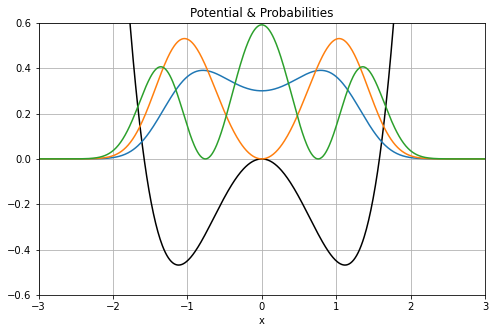

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit
from matplotlib import cm
import math

## Test con potenziale armonico

Text(0.5, 1.0, '$\\langle H \\rangle$ per blocks')

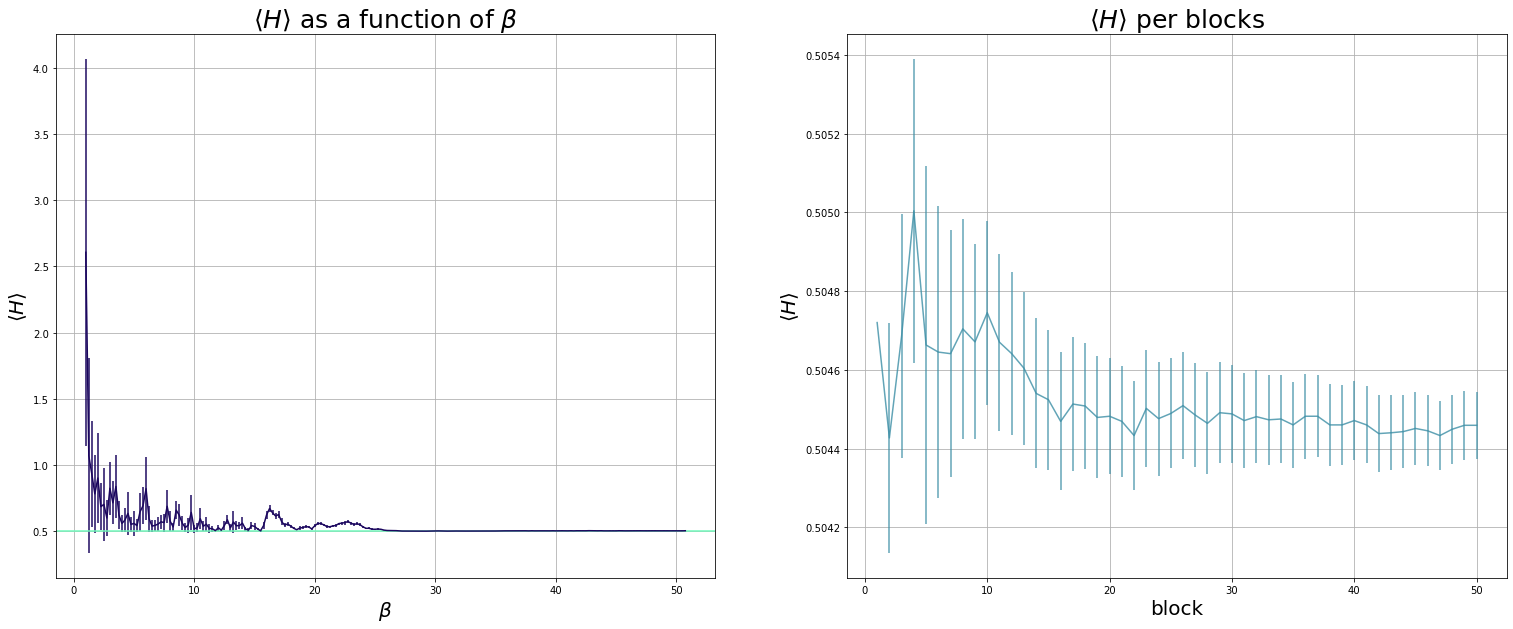

In [10]:
x, y_int, err_int = np.loadtxt("armonic_test/armonic_block_ave.dat", usecols=(0, 1, 2), unpack='true', delimiter=",")
beta, sigma, mu, I, err_I = np.loadtxt("armonic_test/armonic_integral_beta.dat", usecols=(0, 1, 2, 3, 4), unpack='true', delimiter=",")

fig, ax =plt.subplots(1,2,figsize=(26, 10))
ax[0].errorbar(beta[:200], I[:200], yerr=err_I[:200], label = "simulated", color="#1B065E")
ax[0].set_xlabel(r'$\beta$', fontsize=20)
ax[0].set_ylabel(r'$\langle H \rangle$', fontsize=20)
ax[0].grid()
ax[0].set_title(r"$\langle H \rangle$ as a function of $\beta$", fontsize=25)
ax[0].axhline(y=0.5, color="#70F8BA")

ax[1].errorbar(x, y_int, yerr=err_int, label = "simulated", alpha = 0.8, color="#3B8EA5")
ax[1].set_xlabel('block', fontsize=20)
ax[1].set_ylabel(r'$\langle H\rangle$', fontsize=20)
ax[1].grid()
ax[1].set_title(r"$\langle H \rangle$ per blocks", fontsize=25)

Text(0.5, 1.0, '$\\mu$ and $\\sigma$ changes')

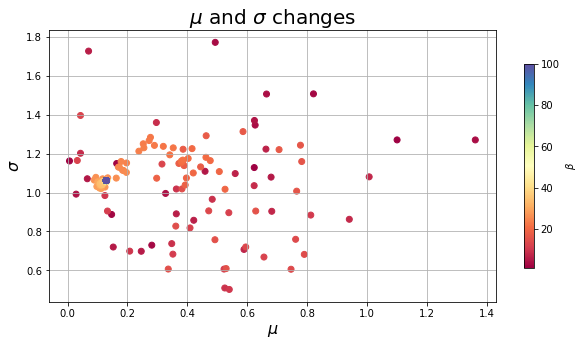

In [14]:
fig, ax =plt.subplots(1,1,figsize=(10, 5))
plt.scatter(mu, sigma, c=beta, cmap='Spectral')
cbar=plt.colorbar(label=r"$\beta$", orientation="vertical",shrink=.75)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)
ax.grid()
ax.set_title(r"$\mu$ and $\sigma$ changes", fontsize=20)

Prima di affrontare il problema ho testato l'algoritmo su un potenziale noto: il potenziale armonico con $\omega=1$ e $m=1$, $V = \frac{x^2}{2}$<br>
Di questo potenziale conosco il valore dell'energia di ground state, $\langle H \rangle = 0.5$, dati $\mu=0$ e $\sigma=1$.

L'algoritmo riesce a trovare dei valori di $\mu$ e $\sigma$ molto vicini ai valori aspettati, convergendo velocemente ma sondando prima, per alte temperature, una buona prozione dello spazio delle fasi e il valor medio dell'Hamiltoniana è quello aspettato.

## Potenziale dato

Text(0.5, 1.0, '$\\langle H \\rangle$ per blocks')

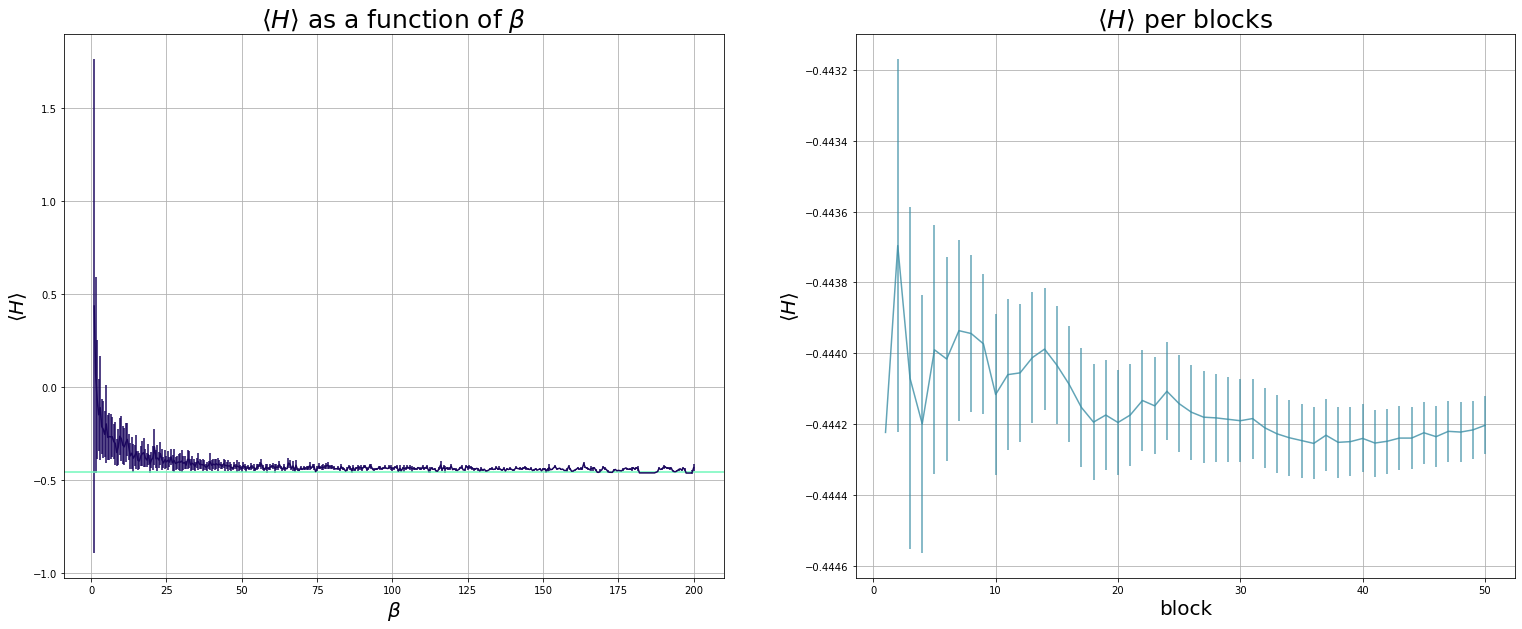

In [24]:
x, y_int, err_int = np.loadtxt("block_ave.dat", usecols=(0, 1, 2), unpack='true', delimiter=",")
beta, sigma, mu, I, err_I = np.loadtxt("integral_beta.dat", usecols=(0, 1, 2, 3, 4), unpack='true', delimiter=",")

fig, ax =plt.subplots(1,2,figsize=(26, 10))
ax[0].errorbar(beta, I, yerr=err_I, label = "simulated", color="#1B065E")
ax[0].set_xlabel(r'$\beta$', fontsize=20)
ax[0].set_ylabel(r'$\langle H \rangle$', fontsize=20)
ax[0].grid()
ax[0].set_title(r"$\langle H \rangle$ as a function of $\beta$", fontsize=25)
ax[0].axhline(y=E[0], color="#70F8BA")

ax[1].errorbar(x, y_int, yerr=err_int, label = "simulated", alpha = 0.8, color="#3B8EA5")
ax[1].set_xlabel('block', fontsize=20)
ax[1].set_ylabel(r'$\langle H\rangle$', fontsize=20)
ax[1].grid()
ax[1].set_title(r"$\langle H \rangle$ per blocks", fontsize=25)

Text(0.5, 1.0, '$\\mu$ and $\\sigma$ changes')

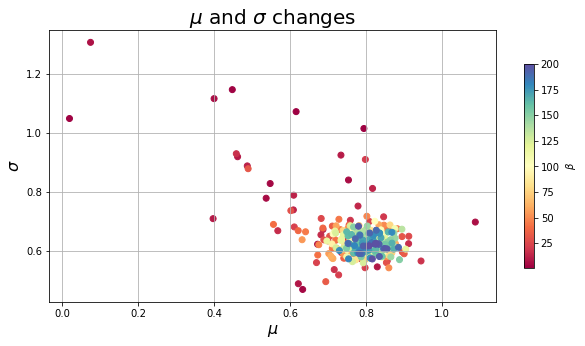

In [16]:
fig, ax =plt.subplots(1,1,figsize=(10, 5))
plt.scatter(mu, sigma, c=beta, cmap='Spectral')
cbar=plt.colorbar(label=r"$\beta$", orientation="vertical",shrink=.75)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)
ax.grid()
ax.set_title(r"$\mu$ and $\sigma$ changes", fontsize=20)

## Simulated Ground State

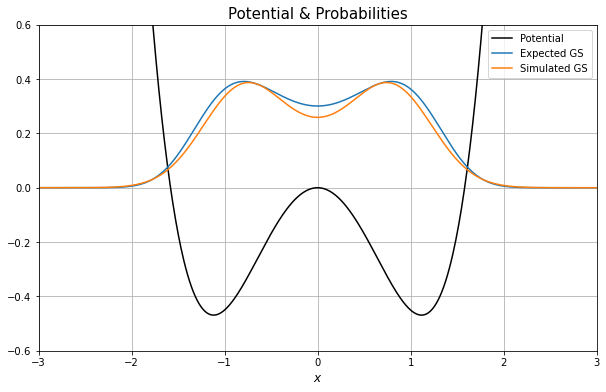

In [17]:
psi_1=np.zeros(N)
mu0=mu[-1]
sigma0=sigma[-1]
x = np.linspace(-a/2, a/2, N)
for i in range (N): 
    psi_1[i]=math.exp(-(((x[i]+mu0)/sigma0)**2)/2)+math.exp(-(((x[i]-mu0)/sigma0)**2)/2)

plt.figure(figsize=(10,6))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="Expected GS")
plt.plot(x,(psi_1*0.6)**2, label="Simulated GS")
plt.title("Potential & Probabilities", fontsize=15)
plt.xlabel(r"$x$", fontsize=12)
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Dopo aver testato l'algoritmo sul potenziale armonico noto, ho utilizzato lo stesso per valutare il ground state del potenziale dato: $V(x) = x^4 - \frac{5}{2}x^2$.

Come si nota dai grafici, l'algoritmo converge verso il valore aspettato per con la diminuzione della temperatura ma rimane comunque oscillante anche per $\beta$ molto grandi.<br>
Questo può anche essere osservato nel grafico delle variazioni di $\sigma$ e $\mu$: l'area dello spazio delle fasi esplorata è sempre più piccola con l'aumentare di $\beta$ ma comunque dispersiva attorno a una coppia di valori.

L'algoritmo lavora partendo da $\beta = 1$ fino a $\beta = 200$ con uno step di $0.5$.<br>
I valori iniziali di $\sigma$ e $\mu$ sono: $\sigma=1$ , $\mu=1$. Entrambi i parametri variano con $\delta=0.3$ (intervallo in cui l'algoritmo sceglie il valori per la mossa corrente), che rimane costante al diminuire di $\beta$.<br>
Questa potrebbe essere la spiegazione della mancata convergenza netta dei due parametri: i due parametri variano in maniera costante per esplorare meglio lo spazio delle fasi e l'algoritmo accetta comunque queste mosse che variano di poco il valore dell'integrale anche a temperature basse. <br>
Tra le variazioni dell'algoritmo ho provato a far variare lo stepsize dei due parametri sia con $\beta$ (ad ogni ciclo a $\delta$ era sottratto un valore pari a sè stesso diviso $\sqrt[4]{\beta}$) che in maniera indipendente (ad ogni ciclo a $\delta$ era sottratto un valore pari a sè stesso diviso per 20 o altri numeri interi). In questo modo. però, per temperature basse però i valori di $\sigma$, $\mu$ e dell'integrale variano di poco, rendendo la convergenza molto lenta.

Alla fine del processo di Simulated Annealing i valori trovati sono: $\mu = 0.807541$ $\sigma = 0.616452$ e l'energia dello stato fondamentale è $\langle H \rangle = -0.444203$.<br>
Nonostante ciò, il ground state predetto è simile a quello aspettato a meno di una normalizzazione.